In [ ]:
# 팬더스로 상장법인 목록 읽기
# KIND -> 상장법인상세정보 -> 상장법인목록 -> Excel 다운
# 상장법인 목록의 확장자가 xls 이므로 read_excel() 대신 read_html()을 써야 함(.xlsx 면 read_excel())
# read_html() 함수 호출 시 html5lib나 lxml 라이브러리 추가설치를 요구하는 경우 추가설치 해주면 됨
import pandas as pd
krx_list = pd.read_html('krx list.xls')
krx_list[0]

In [7]:
# map 함수를 이용해 종목코드 앞에 0이 빠진 경우 다시 채워줌
krx_list[0].종목코드 = krx_list[0].종목코드.map('{:06d}'.format)
krx_list[0]

,회사명,종목코드,업종,주요제품,상장일,결산월,대표자명,홈페이지,지역
0,코람코에너지리츠,357120,부동산 임대 및 공급업,부동산 투자 및 관리,2020-08-31,11월,이성균,http://www.koramco.co.kr,서울특별시
1,미래에셋대우스팩 5호,353490,금융 지원 서비스업,금융 지원 서비스업,2020-08-28,12월,김영도,NaN,서울특별시
2,아이디피,332370,컴퓨터 및 주변장치 제조업,"카드인쇄용 프린터, 카드인쇄용 리본",2020-08-24,12월,노현철,http://www.idp-corp.com,서울특별시
3,셀레믹스,331920,기초 의약물질 및 생물학적 제제 제조업,타겟캡처키트,2020-08-21,12월,"김효기, 이용훈",http://www.celemics.com/,서울특별시
4,데이드림엔터,348840,"영화, 비디오물, 방송프로그램 제작 및 배급업",드라마 및 영화제작,2020-08-18,12월,송정우,http://www.daydream.kr,서울특별시
...,...,...,...,...,...,...,...,...,...
2364,CJ대한통운,000120,도로 화물 운송업,"Contract Logistics, 포워딩, 항만하역, 해운, 택배국제특송, SCM...",1956-07-02,12월,박근희,http://www.cjlogistics.com,서울특별시
2365,메리츠화재,000060,보험업,"손해보험(화재,해상,운송보험)",1956-07-02,12월,김용범,http://www.meritzfire.com,서울특별시
2366,경방,000050,종합 소매업,"섬유류(면사,면혼방사,면직물,면혼방직물,화섬사,화섬직물) 제조,도매,수출입",1956-03-03,12월,"김준, 김담",http://www.kyungbang.co.kr,서울특별시
2367,유수홀딩스,000700,회사 본부 및 경영 컨설팅 서비스업,지주사업,1956-03-03,12월,송영규,http://www.eusu-holdings.com,서울특별시


In [10]:
# read_html() 함수는 url을 이용해 인터넷 상 파일도 읽을 수 있음
df = pd.read_html('https://kind.krx.co.kr/corpgeneral/corpList.do?method=download&searchType=13')[0] # 결과값을 데이터프레임으로 받기
#URL을 어떻게 따는지는 잘 모르겠음
df['종목코드'] = df['종목코드'].map('{:06d}'.format)
df = df.sort_values(by='종목코드') # 기본차순은 오름차순, ascending = False 를 추가하면 내림차순
df

,회사명,종목코드,업종,주요제품,상장일,결산월,대표자명,홈페이지,지역
931,동화약품,000020,의약품 제조업,"의약품 제조,판매,수출입",1976-03-24,12월,박기환,http://www.dong-wha.co.kr,서울특별시
1494,KR모터스,000040,그외 기타 운송장비 제조업,"이륜차(오토바이) 제조,도매",1976-05-25,12월,이기복,http://www.krmotors.com,경상남도
1499,경방,000050,종합 소매업,"섬유류(면사,면혼방사,면직물,면혼방직물,화섬사,화섬직물) 제조,도매,수출입",1956-03-03,12월,"김준, 김담",http://www.kyungbang.co.kr,서울특별시
1521,메리츠화재,000060,보험업,"손해보험(화재,해상,운송보험)",1956-07-02,12월,김용범,http://www.meritzfire.com,서울특별시
37,삼양홀딩스,000070,기타 금융업,"지주회사,경영자문컨설팅",1968-12-27,12월,윤재엽,http://www.samyang.com,서울특별시
...,...,...,...,...,...,...,...,...,...
2310,코오롱티슈진,950160,기초 의약물질 및 생물학적 제제 제조업,골관절염 치료제,2017-11-06,12월,"노문종, 한성수",http://tissuegene.com,미국
717,JTC,950170,종합 소매업,"식품류, 생활용품류, 화장품류 (사후면세업)",2018-04-06,02월,구철모,http://www.groupjtc.com/korean/,일본
1292,SNK,950180,소프트웨어 개발 및 공급업,"IP 라이센스, 콘솔, 모바일 게임",2019-05-07,07월,"토야마 코이치, 갈지휘",http://www.snk-corp.co.jp,일본
1627,미투젠,950190,소프트웨어 개발 및 공급업,"캐주얼게임, 소셜카지노게임",2020-08-18,12월,린즈웨이/라우호밍,http://www.me2zen.com,홍콩


In [3]:
# HTML 익히기 웹 브라우저는 최종적으로 HTML로 변환된 결과를 렌더링해서 표시하기 때문에 HTML을 알아야함
# HTML(Hypertext Markup Language) , <>로 둘러쌓인 부분을 '태크', 첫 <>는 여는 태그, 마지막 <>는 닫는 태그
# 주요 태그는 <html> <head> <body> <p> (문단) <br> (줄바꿈) <b> (볼드체) <table> 테이블 <tr> 테이블행 <a> 하이퍼링크

#웹에서 일별 시세 구하기
#네이버 금융 일별 시세 분석하기 : 셀트리온 - 일별시세 페이지(프레임) 소스보기
#https://finance.naver.com/item/sise_day.nhn?code=068270&page=1
#뷰티풀수프로 일별 시세 가져오기 ; pip install beautifulsoup4, pip install lxml 선행(lxml는 파서 라이브러리)

#find_all()함수와 find 함수 비교 - 원하는 태그를 찾아주는 함수들
#find_all(['검색할 태그'][,class_='클래스속성값'][,id='아이디 속성값'][,limit=찾을개수])
#find(['검색할 태그'][,class_='클래스속성값'][,id='아이디 속성값'])

from bs4 import BeautifulSoup
from urllib.request import urlopen

url = 'https://finance.naver.com/item/sise_day.nhn?code=068270&page=1'
with urlopen(url) as doc:
    html = BeautifulSoup(doc, 'lxml')
    pgrr = html.find('td',class_ = 'pgRR')
    print(pgrr.a['href'])


None


In [14]:
print(pgrr.prettify())

<td class="pgRR">
 <a href="/item/sise_day.nhn?code=068270&amp;page=375">
  맨뒤
  <img alt="" border="0" height="5" src="https://ssl.pstatic.net/static/n/cmn/bu_pgarRR.gif" width="8"/>
 </a>
</td>



In [15]:
print(pgrr.text) #태그를 제외한 텍스트 부분만 구할 땐 .text


맨뒤
				




In [18]:
#전체 페이지 수를 확인해보면
with urlopen(url) as doc:
    html = BeautifulSoup(doc, 'lxml')
    pgrr = html.find('td',class_ = 'pgRR')
    s = str(pgrr.a['href']).split('=')
    last_page = s[-1]
last_page

'375'

In [9]:
#전체 페이지를 읽어오면
df = pd.DataFrame()
sise_url = 'https://finance.naver.com/item/sise_day.nhn?code=068270'

for page in range(1, int(last_page)+1):
    page_url = '{}&page={}'.format(sise_url,page)
    df = df.append(pd.read_html(page_url, header=0)[0]) #read_html을 이용하면 간편하게 읽어들이기 가능
    
df=df.dropna()
df

NameError: name 'last_page' is not defined

In [79]:
#날짜로 인덱싱 하는 방법
df2 = df.set_index(df['날짜'].values)
df2 = df2.drop('날짜',axis=1)
df2.index.name = '날짜'

In [80]:
df2.index = pd.to_datetime(df2.index) # 인덱스 날짜 형식으로 바꾸기
df2

,종가,전일비,시가,고가,저가,거래량
날짜,,,,,,
2020-09-03,299500.0,1000.0,300500.0,301500.0,297500.0,491126.0
2020-09-02,300500.0,2500.0,299500.0,304000.0,298000.0,547657.0
2020-09-01,298000.0,1000.0,297000.0,302000.0,295000.0,668602.0
2020-08-31,297000.0,7500.0,305000.0,305500.0,296500.0,1079872.0
2020-08-28,304500.0,0.0,306000.0,308000.0,303500.0,557944.0
2020-08-27,304500.0,6000.0,310500.0,311000.0,304000.0,722862.0
2020-08-26,310500.0,4000.0,312000.0,319500.0,309000.0,1262116.0
2020-08-25,306500.0,3500.0,310500.0,311000.0,304500.0,600050.0
2020-08-24,310000.0,9000.0,304500.0,311000.0,301500.0,814190.0


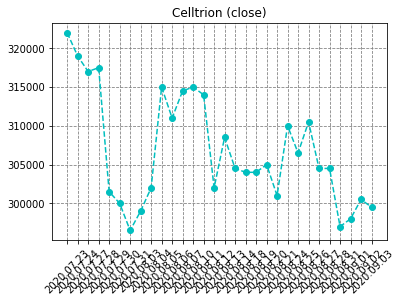

In [101]:
#OHLC와 캔들차트 (둘다 고가,저가,시가,종가를 차트에 표현하기 위한 그림)
#OHLC데이터를 하나의 캔들로 그리기 전 종가만으로 가격 변동을 표시해봄ㄴ
import matplotlib.pyplot as plt
%matplotlib inline

df = df.dropna()
df = df.iloc[0:30] #30개 데이터만 추출
df = df.sort_values(by='날짜')

plt.title('Celltrion (close)')
plt.xticks(rotation=45) # 날짜가 보이기 쉽게 45도 기울임
plt.plot(df['날짜'], df['종가'], 'co--')
plt.grid(color='gray', linestyle='--')
plt.show()


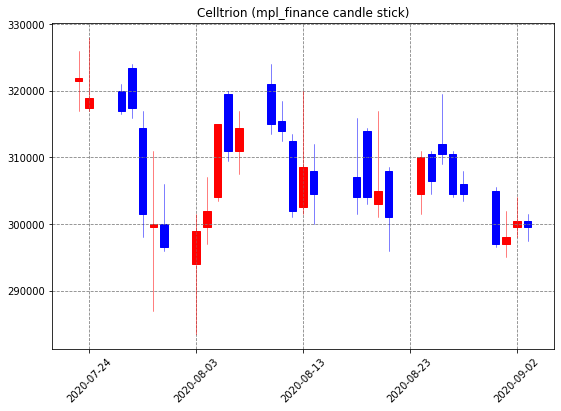

In [102]:
#셀트리온 캔들차트
#구버전으로 캔들차트 그리기 , !pip install mpl_finance 선행
from matplotlib import dates as mdates
from mpl_finance import candlestick_ohlc
from datetime import datetime

#차트출력을 위한 데이터프레임 가공
for idx in range(0, len(df)):
    dt = datetime.strptime(df['날짜'].values[idx], '%Y.%m.%d').date() #날짜칼럼의 %Y.%m.%d 형식 문자열을 datetime형으로 변환
    df['날짜'].values[idx] = mdates.date2num(dt) #위의 datetime형을 다시 float형으로 변환
ohlc = df[['날짜','시가','고가','저가','종가']]

#엠피엘_파이낸스로 캔들차트 그리기
plt.figure(figsize=(9,6))
ax = plt.subplot(1,1,1)
plt.title('Celltrion (mpl_finance candle stick)')
candlestick_ohlc(ax, ohlc.values, width = 0.7, colorup = 'red', colordown = 'blue') # candlestic_ohlc()함수의 두번째 인수는 [time, open, high, low, close] 형태여야 함, 이때 time은 반드시 float형태여야 함
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)
plt.grid(color='gray', linestyle='--')
plt.show()

In [7]:
#신버전으로 캔들차트 그리기 ; pip install --upgrae mplfinance 선행
#mplfinance는 OHLC 데이터칼럼과 날짜시간 인덱스를 포함한 데이터프레임만 있으면 자동으로 데이터변환작업이 이루어짐
import mplfinance as mpf
#mpl.plot(OHLC 데이터프레임, [, title = 차트제목] [,type = 차트형태][, mav = 이동평균선][,volume = 거래량표시여부][,ylabel=y축레이블])
import pandas as pd


In [ ]:
df3 = pd.DataFrame()

for page in range(1, 5): #4페이지만 불러옴
    page_url = '{}&page={}'.format(sise_url,page)
    df3 = df3.append(pd.read_html(page_url, header=0)[0])

df3 = df3.dropna()
df3 = df3.iloc[0:30]
df3 = df3.rename(columns={'날짜':'Date', '시가' : 'Open', '고가' : 'High', '저가' : 'Low', '종가' : 'Close', '거래량' : 'Volume'})
df3 = df3.sort_values(by='Date')
df3.index = pd.to_datetime(df3.Date)
df3 = df3[['Open', 'High', 'Low', 'Close', 'Volume']]

mpf.plot(df3, title='Celltrion candle chart', type='candle',volume=True, mav=6)

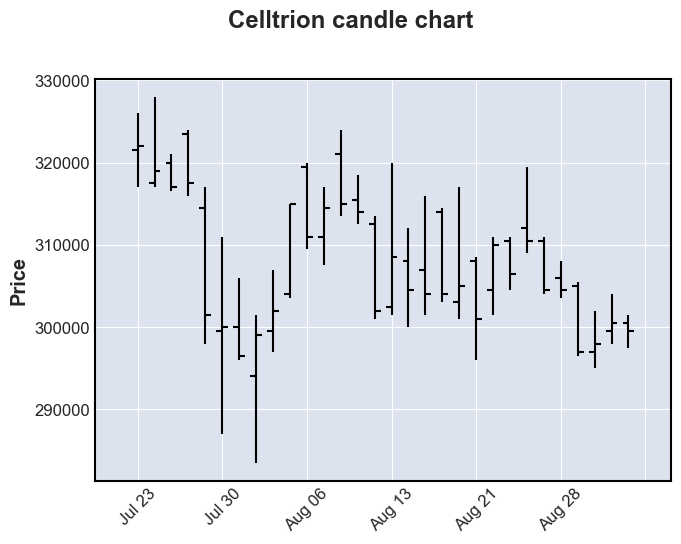

In [114]:
mpf.plot(df3, title='Celltrion candle chart', type='ohlc')

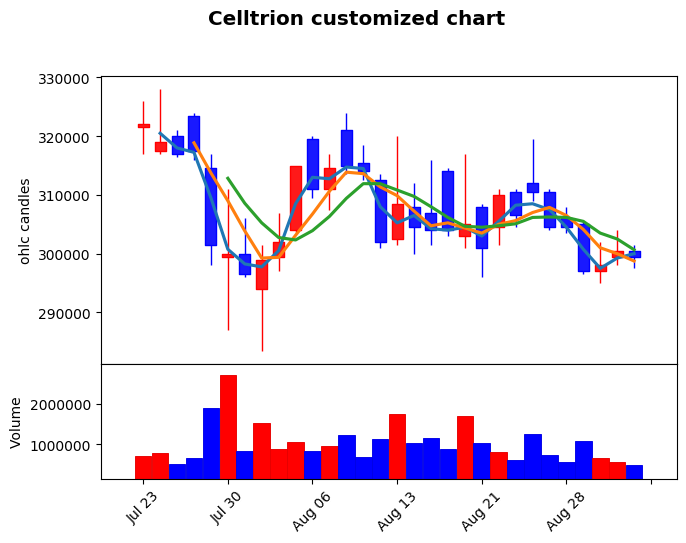

In [125]:
# mpf 에 추가적인 옵션을 지정하려면
kwargs = dict(title = 'Celltrion customized chart', type = 'candle', mav = (2,4,6), volume = True, ylabel = 'ohlc candles') # kwargs는 keyword arguments의 약자이며 mpf.plot() 함수를 호출할 때 쓰이는 여러 인수를 담는 딕셔너리(반드시 저 단어일 필요는 X)
#이평선은 세개까지 지정 가능, dict는 중괄호 쓸 땐는 {A: B}, dict() 클래스 쓸땐 dict(A=B) 꼴임을 잊지말기
mc = mpf.make_marketcolors(up='r', down = 'b', inherit=True) #색상 결정(필수)
s = mpf.make_mpf_style(marketcolors=mc)
mpf.plot(df3, **kwargs, style=s)